In [1]:
# 데이타 시각화해야 하는 이유
# MG1S비행 지도 그리기

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from collections import OrderedDict
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
MG1S_df=pd.read_csv('2021_03_19_MG1S.csv')
MG1S_df = pd.DataFrame.from_dict(OrderedDict(MG1S_df))

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (49,50,160,161,162,163,164,165,166,167,168,169,210,214,215,216,239) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
MG1S_df

,Clock:Tick#,Clock:offsetTime,IMU_ATTI(0):Longitude[degrees [-180;180]],IMU_ATTI(0):Latitude[degrees [-180;180]],IMU_ATTI(0):press:D[meters],IMU_ATTI(0):alti:D[meters],IMU_ATTI(0):relativeHeight:C[meters],IMU_ATTI(0):absoluteHeight:C[meters],IMU_ATTI(0):numSats,IMU_ATTI(0):roll:C[degrees [-180;180]],...,BatteryInfo:BatCurrent:D,BatteryInfo:BatCap:D,BatteryInfo:CapPercnt:D,BatteryInfo:BatTemp:D,BatteryInfo:BatAuth:D,BatteryInfo:BatDataCnt:D,BatteryInfo:FullCap:D,Attribute|Value,ConvertDatV3,4.2.1
0,0,-54.645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,195738694,-11.147,NaN,NaN,-71.754840,-71.914670,NaN,NaN,13.0,0.763620,...,108.0,1.0,33.0,10356.0,Firmware Date| Feb 26 2019,NaN,NaN,NaN,NaN,NaN
2,195889450,-11.114,NaN,NaN,-71.675570,-71.914890,NaN,NaN,13.0,0.762871,...,108.0,1.0,33.0,10356.0,ACType|UNKNOWN,NaN,NaN,NaN,NaN,NaN
3,196040161,-11.080,NaN,NaN,-72.034920,-71.896660,NaN,NaN,13.0,0.764348,...,108.0,1.0,33.0,10356.0,dateTime|2021-3-19 1:8:40 GMT,NaN,NaN,NaN,NaN,NaN
4,196190189,-11.047,NaN,NaN,-71.691420,-71.897410,NaN,NaN,13.0,0.765123,...,108.0,1.0,33.0,10356.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13938,2305823157,457.760,126.295285,36.591802,-72.864655,-73.843290,0.911796,NaN,14.0,0.996262,...,203.0,1.0,483.0,10356.0,NaN,NaN,NaN,NaN,NaN,NaN
13939,2305974188,457.794,126.295285,36.591802,-72.880510,-73.840010,0.895943,NaN,14.0,0.992485,...,203.0,1.0,483.0,10356.0,NaN,NaN,NaN,NaN,NaN,NaN
13940,2306124749,457.828,126.295285,36.591802,-73.033770,-73.840490,0.742683,NaN,14.0,1.011875,...,203.0,1.0,483.0,10356.0,NaN,NaN,NaN,NaN,NaN,NaN
13941,2306275482,457.861,126.295285,36.591802,-72.922790,-73.852340,0.853660,NaN,14.0,0.997954,...,203.0,1.0,483.0,10356.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(MG1S_df.columns)

Index(['Clock:Tick#', 'Clock:offsetTime',
       'IMU_ATTI(0):Longitude[degrees [-180;180]]',
       'IMU_ATTI(0):Latitude[degrees [-180;180]]',
       'IMU_ATTI(0):press:D[meters]', 'IMU_ATTI(0):alti:D[meters]',
       'IMU_ATTI(0):relativeHeight:C[meters]',
       'IMU_ATTI(0):absoluteHeight:C[meters]', 'IMU_ATTI(0):numSats',
       'IMU_ATTI(0):roll:C[degrees [-180;180]]',
       ...
       'BatteryInfo:BatCurrent:D', 'BatteryInfo:BatCap:D',
       'BatteryInfo:CapPercnt:D', 'BatteryInfo:BatTemp:D',
       'BatteryInfo:BatAuth:D', 'BatteryInfo:BatDataCnt:D',
       'BatteryInfo:FullCap:D', 'Attribute|Value', 'ConvertDatV3', '4.2.1'],
      dtype='object', length=245)


In [6]:
# F 컬럼 
MG1S_df = MG1S_df.rename(columns={"IMU_ATTI(0):alti:D[meters]": "IMU_ATTI_0:alti:D", 
                                  "GPS:Long[degrees]": "GPS:Long", 
                                  "GPS:Lat[degrees]": "GPS:Lat", 
                                  "GPS:heightMSL[meters]" : "GPS:heightMSL"})

In [7]:
print(MG1S_df.columns)

Index(['Clock:Tick#', 'Clock:offsetTime',
       'IMU_ATTI(0):Longitude[degrees [-180;180]]',
       'IMU_ATTI(0):Latitude[degrees [-180;180]]',
       'IMU_ATTI(0):press:D[meters]', 'IMU_ATTI_0:alti:D',
       'IMU_ATTI(0):relativeHeight:C[meters]',
       'IMU_ATTI(0):absoluteHeight:C[meters]', 'IMU_ATTI(0):numSats',
       'IMU_ATTI(0):roll:C[degrees [-180;180]]',
       ...
       'BatteryInfo:BatCurrent:D', 'BatteryInfo:BatCap:D',
       'BatteryInfo:CapPercnt:D', 'BatteryInfo:BatTemp:D',
       'BatteryInfo:BatAuth:D', 'BatteryInfo:BatDataCnt:D',
       'BatteryInfo:FullCap:D', 'Attribute|Value', 'ConvertDatV3', '4.2.1'],
      dtype='object', length=245)


In [8]:
MG1S_df['GPS:Lat']

0              NaN
1        36.591828
2        36.591828
3        36.591828
4        36.591828
           ...    
13938    36.591802
13939    36.591802
13940    36.591802
13941    36.591802
13942    36.591802
Name: GPS:Lat, Length: 13943, dtype: float64

In [9]:
MG1S_df['GPS:dateTimeStamp']=pd.to_datetime(MG1S_df['GPS:dateTimeStamp'], format = '%Y-%m-%d')

In [10]:
MG1S_df['GPS:dateTimeStamp'].dtypes

datetime64[ns, UTC]

In [11]:
Time_Ser =MG1S_df.groupby('GPS:dateTimeStamp', sort = False)['GPS:dateTimeStamp'].min()

In [12]:
Time_Ser

GPS:dateTimeStamp
2021-03-19 01:08:56+00:00   2021-03-19 01:08:56+00:00
2021-03-19 01:08:57+00:00   2021-03-19 01:08:57+00:00
2021-03-19 01:08:58+00:00   2021-03-19 01:08:58+00:00
2021-03-19 01:08:59+00:00   2021-03-19 01:08:59+00:00
2021-03-19 01:09:00+00:00   2021-03-19 01:09:00+00:00
                                       ...           
2021-03-19 01:16:22+00:00   2021-03-19 01:16:22+00:00
2021-03-19 01:16:23+00:00   2021-03-19 01:16:23+00:00
2021-03-19 01:16:24+00:00   2021-03-19 01:16:24+00:00
2021-03-19 01:16:25+00:00   2021-03-19 01:16:25+00:00
2021-03-19 01:16:26+00:00   2021-03-19 01:16:26+00:00
Name: GPS:dateTimeStamp, Length: 451, dtype: datetime64[ns, UTC]

In [13]:
lat_Ser =MG1S_df.groupby('GPS:dateTimeStamp', sort = False)['GPS:Lat'].mean()

In [14]:
lat_Ser

GPS:dateTimeStamp
2021-03-19 01:08:56+00:00    36.591826
2021-03-19 01:08:57+00:00    36.591824
2021-03-19 01:08:58+00:00    36.591820
2021-03-19 01:08:59+00:00    36.591818
2021-03-19 01:09:00+00:00    36.591816
                               ...    
2021-03-19 01:16:22+00:00    36.591802
2021-03-19 01:16:23+00:00    36.591802
2021-03-19 01:16:24+00:00    36.591802
2021-03-19 01:16:25+00:00    36.591802
2021-03-19 01:16:26+00:00    36.591802
Name: GPS:Lat, Length: 451, dtype: float64

In [15]:
lon_Ser =MG1S_df.groupby('GPS:dateTimeStamp', sort = False)['GPS:Long'].mean()

In [16]:
lon_Ser

GPS:dateTimeStamp
2021-03-19 01:08:56+00:00    126.295266
2021-03-19 01:08:57+00:00    126.295268
2021-03-19 01:08:58+00:00    126.295269
2021-03-19 01:08:59+00:00    126.295270
2021-03-19 01:09:00+00:00    126.295270
                                ...    
2021-03-19 01:16:22+00:00    126.295286
2021-03-19 01:16:23+00:00    126.295286
2021-03-19 01:16:24+00:00    126.295286
2021-03-19 01:16:25+00:00    126.295286
2021-03-19 01:16:26+00:00    126.295286
Name: GPS:Long, Length: 451, dtype: float64

In [17]:
AltMSL_Ser =MG1S_df.groupby('GPS:dateTimeStamp', sort = False)['GPS:heightMSL'].mean()

In [18]:
AltMSL_Ser

GPS:dateTimeStamp
2021-03-19 01:08:56+00:00     9.775913
2021-03-19 01:08:57+00:00    10.030323
2021-03-19 01:08:58+00:00    10.239162
2021-03-19 01:08:59+00:00    10.369480
2021-03-19 01:09:00+00:00    10.484200
                               ...    
2021-03-19 01:16:22+00:00     8.618200
2021-03-19 01:16:23+00:00     8.196842
2021-03-19 01:16:24+00:00     7.798194
2021-03-19 01:16:25+00:00     7.681903
2021-03-19 01:16:26+00:00     7.690500
Name: GPS:heightMSL, Length: 451, dtype: float64

In [19]:
MG1S_df['IMU_ATTI_0:alti:D']

0              NaN
1       -71.914670
2       -71.914890
3       -71.896660
4       -71.897410
           ...    
13938   -73.843290
13939   -73.840010
13940   -73.840490
13941   -73.852340
13942   -73.861855
Name: IMU_ATTI_0:alti:D, Length: 13943, dtype: float64

In [20]:
AltIMU_Ser =MG1S_df.groupby('GPS:dateTimeStamp', sort = False)['IMU_ATTI_0:alti:D'].mean()

In [21]:
AltIMU_Ser

GPS:dateTimeStamp
2021-03-19 01:08:56+00:00   -71.950230
2021-03-19 01:08:57+00:00   -71.973015
2021-03-19 01:08:58+00:00   -71.874685
2021-03-19 01:08:59+00:00   -71.875052
2021-03-19 01:09:00+00:00   -71.870153
                               ...    
2021-03-19 01:16:22+00:00   -72.628931
2021-03-19 01:16:23+00:00   -73.073021
2021-03-19 01:16:24+00:00   -73.440555
2021-03-19 01:16:25+00:00   -73.746503
2021-03-19 01:16:26+00:00   -73.832929
Name: IMU_ATTI_0:alti:D, Length: 451, dtype: float64

In [22]:
BatteryStatus =MG1S_df.groupby('GPS:dateTimeStamp', sort = False)['BatteryStatus:present:D'].mean() 

In [23]:
BatteryStatus

GPS:dateTimeStamp
2021-03-19 01:08:56+00:00    15.0
2021-03-19 01:08:57+00:00    15.0
2021-03-19 01:08:58+00:00    15.0
2021-03-19 01:08:59+00:00    15.0
2021-03-19 01:09:00+00:00    15.0
                             ... 
2021-03-19 01:16:22+00:00    15.0
2021-03-19 01:16:23+00:00    15.0
2021-03-19 01:16:24+00:00    15.0
2021-03-19 01:16:25+00:00    15.0
2021-03-19 01:16:26+00:00    15.0
Name: BatteryStatus:present:D, Length: 451, dtype: float64

In [25]:
MG1SDateSet=list(zip(Time_Ser, BatteryStatus, lat_Ser, lon_Ser, AltMSL_Ser, AltIMU_Ser))

df=pd.DataFrame(data=MG1SDateSet, columns=['GPS:dateTimeStamp', 
                                           'BatteryStatus:present:D',
                                          'GPS:Lat', 
                                          'GPS:Long', 
                                          'GPS:heightMSL',
                                          'IMU_ATTI_0:alti:D'])

In [26]:
df.to_csv('2021_03_19_MG1S_edited.csv')

In [27]:
print(MG1S_df['GPS:dateTimeStamp'])

0                             NaT
1       2021-03-19 01:08:56+00:00
2       2021-03-19 01:08:56+00:00
3       2021-03-19 01:08:56+00:00
4       2021-03-19 01:08:56+00:00
                   ...           
13938   2021-03-19 01:16:26+00:00
13939   2021-03-19 01:16:26+00:00
13940   2021-03-19 01:16:26+00:00
13941   2021-03-19 01:16:26+00:00
13942   2021-03-19 01:16:26+00:00
Name: GPS:dateTimeStamp, Length: 13943, dtype: datetime64[ns, UTC]


In [28]:
print(type(MG1S_df['GPS:dateTimeStamp']))

<class 'pandas.core.series.Series'>


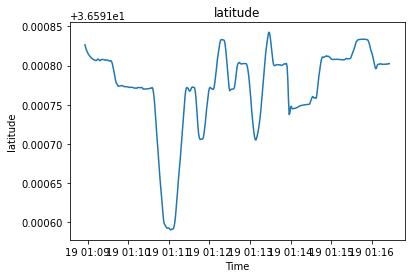

In [29]:
# 데이타 프레임을 Series로 바꾸고.. numpy 제외 하고 그리기..
fig = plt.figure() 
axes = fig.add_subplot(1, 1, 1)
axes.set_title('latitude')
axes.set_xlabel('Time') 
axes.set_ylabel('latitude')
# 

#data = pd.DataFrame(['GPS:Time'],['Motor:Volts:Rfront:volts'])
plt.plot(df['GPS:dateTimeStamp'], df['GPS:Lat'])
plt.show()

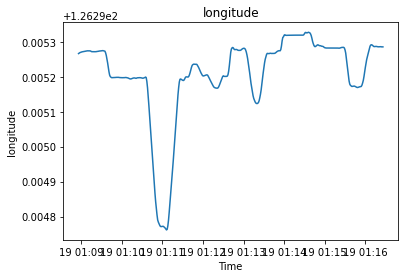

In [30]:
fig = plt.figure() 
axes = fig.add_subplot(1, 1, 1)
axes.set_title('longitude')
axes.set_xlabel('Time') 
axes.set_ylabel('longitude')
# 

#data = pd.DataFrame(['GPS:Time'],['Motor:Volts:Rfront:volts'])
plt.plot(df['GPS:dateTimeStamp'], df['GPS:Long'])
plt.show()

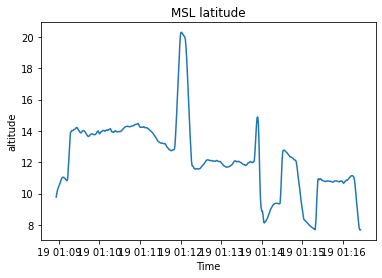

In [31]:
fig = plt.figure() 
axes = fig.add_subplot(1, 1, 1)
axes.set_title('MSL latitude')
axes.set_xlabel('Time') 
axes.set_ylabel('altitude')
# 

plt.plot(df['GPS:dateTimeStamp'], df['GPS:heightMSL'])
plt.show()

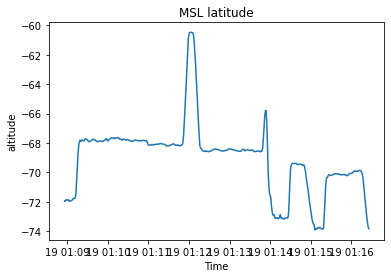

In [32]:
fig = plt.figure() 
axes = fig.add_subplot(1, 1, 1)
axes.set_title('MSL latitude')
axes.set_xlabel('Time') 
axes.set_ylabel('altitude')
# 

plt.plot(df['GPS:dateTimeStamp'], df['IMU_ATTI_0:alti:D'])
plt.show()